# Bank Customer Churn Prediction

## Introduction:
In the "Bank Customer Churn Prediction" project, our goal is to help the bank retain its existing customers by identifying those who are most likely to leave the bank soon. For this, we will use data on past customer behavior and contract terminations. By building a high-quality predictive model, we will be able to take proactive measures to prevent customers from leaving the bank, saving resources and keeping the customer base stable.

## Data Preparation

In the "Data Preparation" section, we will take the essential steps to ensure that the data is ready to be used in building Beta Bank's customer churn prediction model. We will follow a systematic approach to processing different types of features and perform necessary treatments to deal with missing data.

First, we will import the data from the file provided, called "Churn.csv". We will then perform an initial exploration of the data to understand its structure and identify potential issues or quirks that need to be addressed.

During the preparation process, we will check for missing data and take appropriate action to address it, ensuring it does not negatively affect model performance. Additionally, we'll cover coding for categorical variables, as many machine learning algorithms require variables to be represented numerically.

Finally, we'll split the data into training and test sets so that we can evaluate the model's performance on a previously unseen dataset. This step is critical to ensuring that the model is able to generalize and make accurate predictions on new data.

At the end of this section, we will have the data duly prepared and structured, ready to be used in the next stages of the project, such as the analysis of the class balance and the construction of the predictive model.

### Importing Libraries and Data

In [79]:
# Importing the necessary libraries for the project
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, f1_score, roc_auc_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [80]:
# Importing the data
df = pd.read_csv('/datasets/Churn.csv')

# Previewing the first rows of data
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


The data is displayed in the form of a table with several columns representing different customer characteristics. Each row represents a specific customer.

### Initial Data Exploration

#### Check basic data information:

Let's use the info() method to get information about the columns, data types and missing values.

In [81]:
# Getting basic information from the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


* We have a total of 10,000 records with 14 columns.


* The "Tenure" column has missing values, with only 9,091 records filled in.

#### Explore descriptive statistics:

Let's use the describe() method to get summary statistics from numeric columns like mean, standard deviation, quartiles, etc.

In [82]:
# Exploring descriptive statistics
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


* The average "CreditScore" is approximately 650, with a standard deviation of 96.65.


* The average age of clients is around 38 years old, with a standard deviation of 10.49.


* Most customers have a "Tenure" (length of relationship with the bank) between 2 and 7.


* The average account balance is approximately 76,485.


* The average of banking products is 1.53.

#### Removal of non-aggregating columns

We could see that, for our focus on creating a prediction model, despite being numerical, the columns `RowNumber`, `CustomerId` and `Surname` do not bring any benefit to modeling and/or forecasting and can even cause confusion, since they can be confused with ordinal variables.

Therefore, we will remove these and check the result:

In [83]:
# Removing unnecessary columns to define the client's identity
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


#### Analyze the distribution of variables:

We will plot histograms to visualize the distribution of numerical variables and bar graphs for categorical variables.

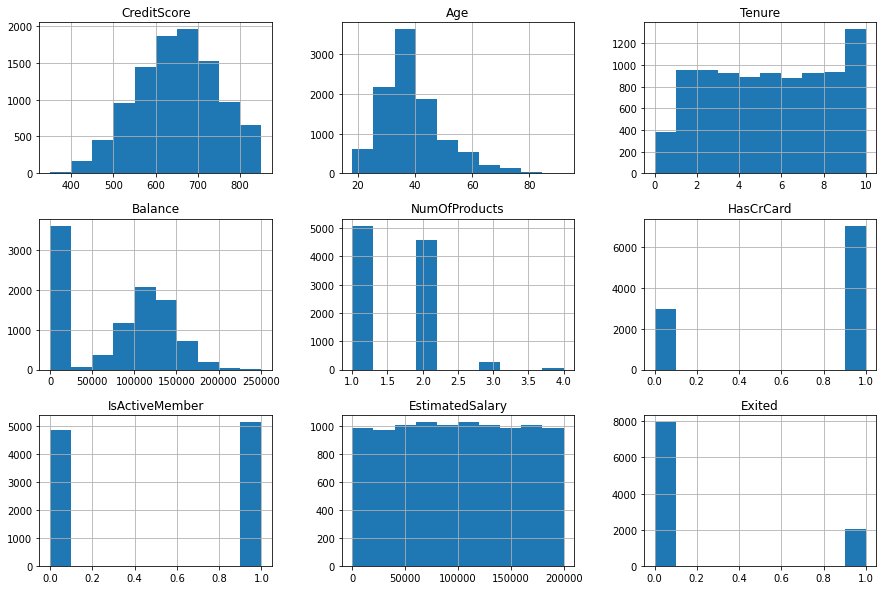

In [84]:
# Analyzing the distribution of numerical variables
df.hist(figsize=(15, 10));

<AxesSubplot:>

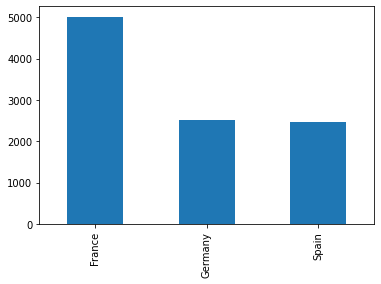

In [85]:
# Analyzing the distribution of categorical variables
df['Geography'].value_counts().plot(kind='bar')

* Most customers are from France, followed by Germany and Spain.


* The distribution of "CreditScore" appears to be close to a normal distribution.


* Most customers have only one banking product.


* Within this period, approximately 80% of customers remain.


* Most customers have a credit card.

#### Check the correlation between the variables:

Let's calculate the correlation matrix and plot a heat map to identify relationships between numerical variables.

In [86]:
# Checking the correlation between numerical variables
df.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,-0.000062,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.013134,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.000062,-0.013134,1.000000,-0.007911,0.011979,0.027232,-0.032178,0.010520,-0.016761
Balance,0.006268,0.028308,-0.007911,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.011979,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.027232,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.032178,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.010520,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.016761,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


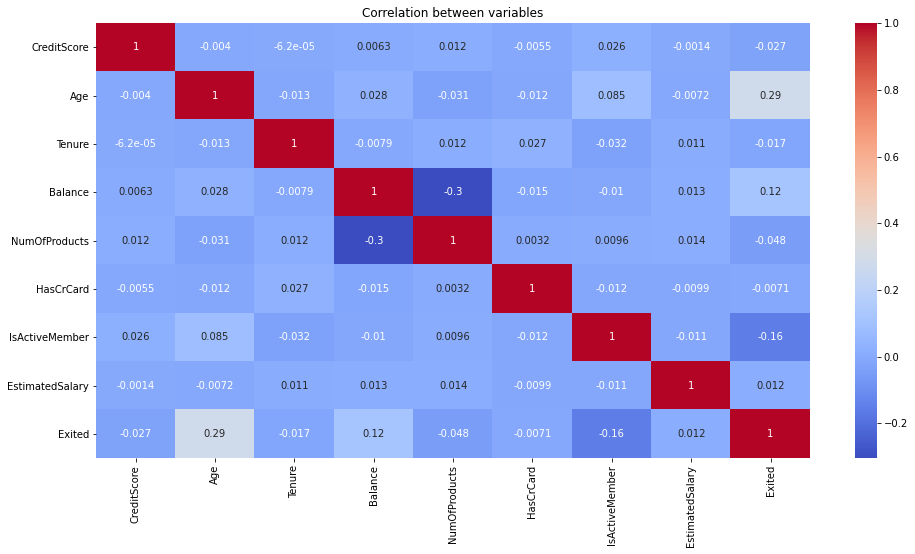

In [87]:
# Making correlation checking easier using a heatmap from the 'seaborn' library
correlation_matrix = df.corr()
plt.figure(figsize=(16, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between variables')
plt.show()

No correlation exceeded the 0.3 index, that is, for the time being we can observe little correlation between the variables. But, among the highest, we can highlight:


* The strongest correlation is between the variable "Exited" (whether the customer left or not) and the customer's age, indicating a possible relationship between age and the probability of cancellation.


* Other significant correlations include "CreditScore" and "Balance" with "Exited".

### Missing Data Handling

#### Possible reasons:

As we explored the data earlier, we found that "Tenure" is the only variable that contains NaN values.

The variable "Tenure" represents the length of time the customer has been in the bank, in years.

It is possible that these missing values occurred for several reasons:

* **Registration Error**: The "Tenure" values may not have been correctly registered during data collection, resulting in missing values.


* **Missing information**: Some customers may not have provided information about the length of stay in the bank, leaving these fields empty.


* **System Did Not Capture Dwell Time**: There may be cases where the system did not correctly capture the customer's Dwell Time, resulting in missing values.

#### Possible actions:

To deal with this missing data, some possibilities can be considered:

* **Fill in by average value**: We can fill in the missing values with the average of the existing "Tenure" values. This would help preserve the central tendency of the data.


* **Fill in by median value**: Another approach is to fill in the missing values with the median value of "Tenure". This option can be more robust against outliers.


* **Fill with zero value**: If there is no clear justification for the missing values in "Tenure", we can assign the value zero to represent the absence of dwell time.


* **Filling based on other variables**: If there is a correlation between "Tenure" and other variables, we can use these relationships to fill in the missing values more accurately.

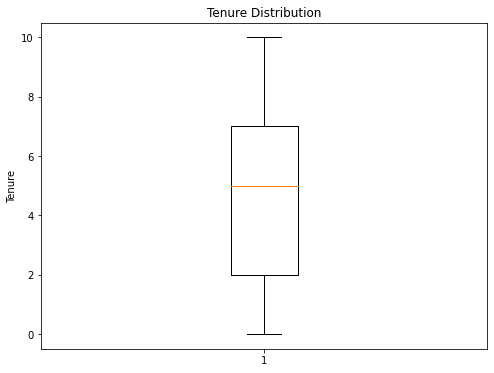

In [88]:
# Creating the Tenure boxplot without the missing values, to observe the distribution of customers' time in the bank
plt.figure(figsize=(8, 6))
plt.boxplot(df['Tenure'].dropna()) # Removing missing values before plotting
plt.title('Tenure Distribution')
plt.ylabel('Tenure')
plt.show()

In [89]:
# Counting the number of customers

df['Tenure'].value_counts().sort_index(ascending=True)

0.0     382
1.0     952
2.0     950
3.0     928
4.0     885
5.0     927
6.0     881
7.0     925
8.0     933
9.0     882
10.0    446
Name: Tenure, dtype: int64

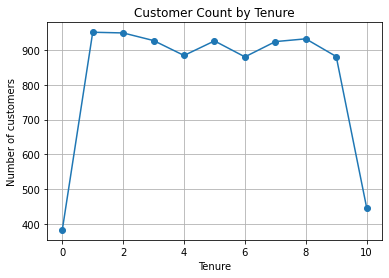

In [90]:
# Counting the amount of customers in each "Tenure" value
count_data = df['Tenure'].value_counts().sort_index(ascending=True)

# Creating the line graph
plt.plot(count_data.index, count_data.values, marker='o')
plt.xlabel('Tenure')
plt.ylabel('Number of customers')
plt.title('Customer Count by Tenure')
plt.grid(True)
plt.show()

In [91]:
df['Tenure'].isna().sum()


909

#### Intermediate Conclusions

* Apparently, we don't have *outliers* and there is a relatively homogeneous distribution between clients and their years in the bank.


* The average (4.99769) and the median (5) are very close and, having already around 900 customers after approximately 5 years with the bank, if we choose to replace the 909 absent with both, the distribution will be totally irregular, causing customers to with 5 years in banking were practically twice as many as customers with any other years in banking.


* We have the option of replacing based on the variable that makes the greatest correlation, which in this case is `IsActiveMember`. However, in addition to this correlation not being considered high (0.032178), it has a binary classification (Yes=1 or No=0). That is, we would normally group by a characteristic of a group and use its average for substitution. It turns out that the average for active customers, which are the majority, will result in virtually the same result as replacing it directly with the general average (4.99769), which again will dramatically raise the middle of the graph (5 years in the bank).


* We only have the option to fill in the value 0 (ZERO). By doing this, we are assigning absent customers a "Tenure" value of 0, indicating that they have not completed one year in the bank. Although we are considering that customers have left the bank, we always have new ones arriving and this approach helps us to avoid significant distortions in the distribution of years in the bank, as we will not have a drastic increase in the number of customers with 5 years in the bank. In addition, as there are already 382 customers with "0 years" in the bank, replacing them with zeros also makes sense.

#### Completion of NaN values

In [92]:
df['Tenure'].fillna(0, inplace=True)


# Counting the number of customers

df['Tenure'].value_counts().sort_index(ascending=True)

0.0     1291
1.0      952
2.0      950
3.0      928
4.0      885
5.0      927
6.0      881
7.0      925
8.0      933
9.0      882
10.0     446
Name: Tenure, dtype: int64

In [93]:
# Checking if the columns really were without null values

df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

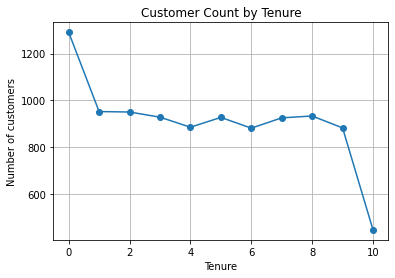

In [94]:
# Counting the amount of customers in each "Tenure" value
count_data = df['Tenure'].value_counts().sort_index(ascending=True)

# Creating the line graph
plt.plot(count_data.index, count_data.values, marker='o')
plt.xlabel('Tenure')
plt.ylabel('Number of customers')
plt.title('Customer Count by Tenure')
plt.grid(True)
plt.show()

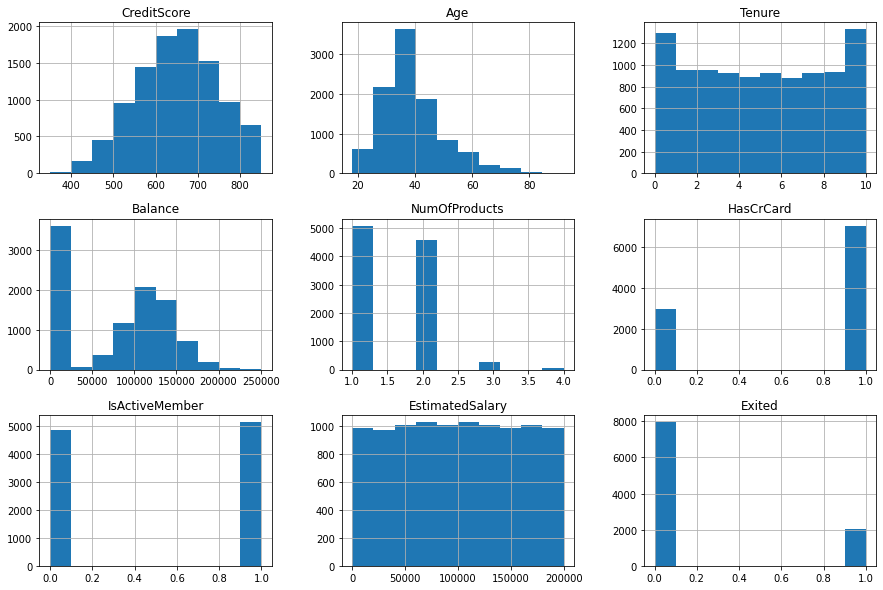

In [95]:
# Analyzing once more the distribution of numerical variables, to compare with the first ones
# and see if we interfered a lot with the distribution of the data after replacing the missing ones with zero

df.hist(figsize=(15, 10));

Apparently the distributions haven't changed much.

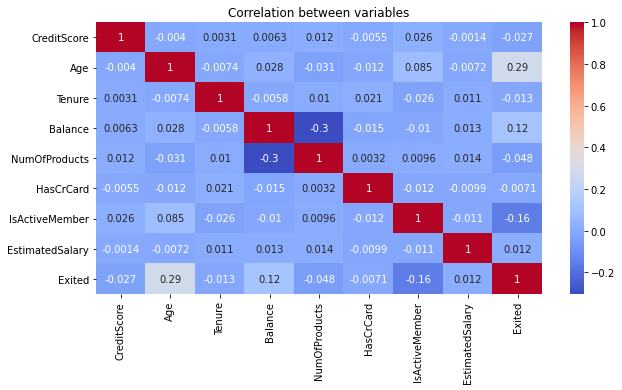

In [96]:
# Making correlation checking easier using a heatmap from the 'seaborn' library
correlation_matrix = df.corr()
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between variables')
plt.show()

The two variables that were most closely related continue to be correlated, as well as `IsActiveMember`, despite having dropped a little, remains the one most closely related to `Tenure`.

Changing the NaN values to zeros seems to have been a good choice.

### Encoding of Categorical Variables

We have some actions that we can perform to handle the categorical variables of our dataset. Here are some suggestions:

* **Identify the categorical variables**: Check which columns of our dataframe contain categorical data. This can be done by looking at the data types of the columns or by looking at the nature of the variables.


* **Analyze the cardinality of categorical variables**: Check the number of unique categories in each categorical variable. This will help us decide which encoding method is most suitable.


* **Apply one-hot coding**: If we have categorical variables with low cardinality, that is, few unique categories, we can apply one-hot coding. This involves creating separate binary columns for each category and assigning a value of 1 for the present category and 0 for the other categories.


* **Apply label encoding**: If we have categorical variables with high cardinality, i.e. many unique categories, we can apply label encoding. This involves assigning a unique numeric value to each category, turning the categorical variable into an ordinal numeric variable.


* **Check the need for ordinal coding**: If we have categorical variables with a natural order, such as "low", "medium" and "high", we can perform ordinal coding, assigning numeric values that represent that order.

#### Identify the categorical variables:

In [97]:
# Analyzing the nature and types of data of each category
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  float64
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 859.5+ KB


When analyzing the columns, we can consider the following variables as categorical: `Geography` and `Gender`.

#### Analyze the cardinality of variables

In [98]:
categorical_columns = ['Geography', 'Gender', 'Age', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']

for column in categorical_columns:
     unique_values = df[column].nunique()
     print(f"The variable '{column}' has {unique_values} unique values.")

The variable 'Geography' has 3 unique values.
The variable 'Gender' has 2 unique values.
The variable 'Age' has 70 unique values.
The variable 'Tenure' has 11 unique values.
The variable 'NumOfProducts' has 4 unique values.
The variable 'HasCrCard' has 2 unique values.
The variable 'IsActiveMember' has 2 unique values.
The variable 'EstimatedSalary' has 9999 unique values.
The variable 'Exited' has 2 unique values.


Interesting. Probably some columns will need to perform grouping and others will not even need to be encoded.


Let's check it out one more time.

In [99]:
# Checking category values to identify those that need coding
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


* For columns `HasCrCard`, `IsActiveMember` and `Exited` we will keep the already present **binary encoding**.


* For creating a Machine Learning model, the columns `CreditScore`, `Age`, `Tenure`, `Balance`, `NumOfProducts` and `EstimatedSalary` represent continuous or discrete numerical values and do not need to be categorized, since which are already represented by numeric values. But let's apply a normalization of these numerical attributes using the *StandardScaler* class from the *sklearn.preprocessing* library to ensure that different values have the same importance in the model.


* For `Geography` and `Gender` we will use **label encoder / preprocessing** from the sklearn library.

#### Apply the new encodings

In [100]:
# Looping through each column in the DataFrame where the type is 'object'
for col in df.select_dtypes(include=['object']).columns:
    
    # Printing column name and unique values
    print(f"{col}: {df[col].unique()}")

    # Initializing a LabelEncoder object
    label_encoder = preprocessing.LabelEncoder()

    # Adjusting the encoder to unique values in the column
    label_encoder.fit(df[col].unique())

    # Transforming the column using the encoder
    df[col] = label_encoder.transform(df[col])

    # Printing the column name and encoded unique values
    print(f"{col}: {df[col].unique()}")

Geography: ['France' 'Spain' 'Germany']
Geography: [0 2 1]
Gender: ['Female' 'Male']
Gender: [0 1]


In [101]:
# Checking the encoded 'df' dataframe
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2.0,0.00,1,1,1,101348.88,1
1,608,2,0,41,1.0,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8.0,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1.0,0.00,2,0,0,93826.63,0
4,850,2,0,43,2.0,125510.82,1,1,1,79084.10,0


There you go!

Now we only have numbers!

### Division into Training and Test Sets

In this section, we will split the data into training and testing sets. The purpose of this division is to evaluate the performance of the model on previously unseen data and to verify its generalizability.

In [102]:
# Going back to the beginning to import the train_test_split function from the sklearn.model_selection module

# Division into training, validation and test sets
train_ratio = 0.75 # ratio to training set
val_ratio = 0.15 # ratio to validation set
test_ratio = 0.15 # ratio to test set

# Division into training and testing set
train_data, test_data = train_test_split(df, test_size=test_ratio, random_state=42)

# Division of training set into training and validation set
train_data, val_data = train_test_split(train_data, test_size=val_ratio/(train_ratio+val_ratio), random_state=42)

# Check the size of the sets
print("Training set size:", len(train_data))
print("Test set size:", len(test_data))
print("Validation set size:", len(val_data))

Training set size: 7083
Test set size: 1500
Validation set size: 1417


In [103]:
# Separating variables and target from the training set
features_train = train_data.drop("Exited", axis=1)
target_train = train_data["Exited"]

# Separating the variables and target from the test set
features_test = test_data.drop("Exited", axis=1)
target_test = test_data["Exited"]

# Separating the variables and target from the validation set
features_valid = val_data.drop("Exited", axis=1)
target_valid = val_data["Exited"]

## Class Balance Analysis

In this section, we will do an analysis of the equilibrium of the classes in the training set. The objective is to verify if there is a significant imbalance between the positive classes (customers who left the bank) and the negative classes (customers who remained in the bank). With this analysis, we will have an initial understanding of the distribution of the data and be able to make more informed decisions when building and evaluating our model.

### Target Variable Distribution

In [104]:
# Checking the balance of classes in the training set
print("Balancing the classes in the training set:")
print(target_train.value_counts(normalize=True))

# Checking the balance of classes in the validation set
print("Balancing the classes in the validation set:")
print(target_valid.value_counts(normalize=True))

Balancing the classes in the training set:
0    0.796979
1    0.203021
Name: Exited, dtype: float64
Balancing the classes in the validation set:
0    0.784051
1    0.215949
Name: Exited, dtype: float64


When we analyze the balancing of classes in the training set, we can see that the proportion of classes is approximately 79.7% for class 0 (customers who did not leave the bank) and 20.3% for class 1 (customers who left the bank). In the validation set, the proportions are around 78.4% for class 0 and 21.5% for class 1. These results indicate that **we have a certain imbalance in the classes**, with class 0 being predominant in both sets.

This information is relevant to our project, since we are dealing with a problem of predicting customers who will leave the bank. Class imbalance can affect the performance of our machine learning model, as it can become biased in favor of the majority class.

Therefore, it will be important to consider class balancing techniques during the training and evaluation of the model, in order to ensure that it is able to adequately handle both types of customers, both those who leave the bank and those who remain.

### Consequences of Class Imbalance

Some of the main problems that can arise due to class imbalance are:

* **Model bias**: The model may be biased towards the majority class, resulting in difficulty in correctly predicting minority class cases.


* **Low Precision**: Model precision can be high for the majority class, but low for the minority class. This can be misleading as the model may be making incorrect predictions for the minority class.


* **Misleading evaluation metrics**: Common metrics such as accuracy can be misleading in cases of class imbalance. For example, a model that always predicts the majority class will have high accuracy but will not be useful for predicting the minority class.


* **Overfitting**: Class imbalance can lead to a greater risk of overfitting, where the model fits too tightly to the majority class data and fails to properly generalize to new data.


To deal with these consequences of class imbalance, it is important to **apply class balancing techniques** during model training and evaluation.

## Building the Initial Model

The purpose of building the initial model is to have a reference to compare with more advanced models that will be developed in the next steps. Based on initial performance, we will be able to identify areas for improvement and make adjustments to the model for better results.

### Model Training without Considering Class Imbalance

In [105]:
# Instantiating the logistic regression model
model = LogisticRegression()

# Training the model on the training data
model.fit(features_train, target_train)

# Making predictions on the validation data
predictions = model.predict(features_valid)

# Evaluating model performance
print(classification_report(target_valid, predictions))

              precision    recall  f1-score   support

           0       0.79      0.98      0.88      1111
           1       0.49      0.06      0.10       306

    accuracy                           0.78      1417
   macro avg       0.64      0.52      0.49      1417
weighted avg       0.72      0.78      0.71      1417



### Evaluation of Initial Model Performance

After training the model without considering class imbalance, we evaluated its performance using the **ranking report metrics**. The results are as follows:


* **Precision** (Precision):

Class 0: 0.79

Class 1: 0.49


* **Recall** (Sensitivity):

Class 0: 0.98

Class 1: 0.06


* **F1-score**:

Class 0: 0.88

Class 1: 0.10

Accuracy: 0.78

Observing these results, we can see that the model obtained a high precision for class 0 (customers who did not leave), but a low precision for class 1 (customers who left). Furthermore, the recall for class 1 is also low, indicating that the model is having difficulty correctly identifying customers who have left.

### Findings and Limitations

The F1-score value is a harmonic mean between precision and recall and gives us an overall measure of the model's performance. In the case of the initial model, the F1-score is low for class 1, indicating that the model is not managing to balance well the trade-off between accuracy and recall for this class.

**In summary, the initial model trained without considering class imbalance has an unsatisfactory performance in predicting customers leaving the bank**. Therefore, it is necessary to seek strategies to improve performance and correct class imbalance.

## Model Improvement

In this section, we will focus on improving the performance of the initial model, normalizing numerical attributes and taking into account the class imbalance present in the data. We'll cover different techniques for correcting this imbalance and assess the impact of these approaches on overall model performance.

### Normalization of numerical attributes

In this code snippet, we will apply the normalization of numerical attributes using the `StandardScaler` class from the `sklearn.preprocessing` library. We will choose to do this transformation on the training, validation and test sets to ensure that the values of different scales have the same importance in the model.

In [106]:
numeric=['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])
features_test.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
6252,-0.575693,1,1,-0.661804,-0.494656,0.335315,0.805116,0,0,-1.011739
4684,-0.296070,0,1,0.379897,-1.137115,-1.213746,0.805116,1,1,0.803046
1731,-0.523911,2,0,0.474597,-0.173427,-1.213746,0.805116,1,0,-0.720708
4742,-1.507767,1,1,1.895098,1.111491,0.694801,0.805116,1,1,1.224689
4521,-0.948522,2,0,-1.135305,0.790262,0.788407,-0.923480,1,1,0.252846


First, we select the relevant numerical attributes: 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts' and 'EstimatedSalary'. Next, we initialize a `StandardScaler()` object and fit it to the training data by calling the `fit()` method. This step calculates the mean and standard deviation of the numerical attributes in the training data.

After that, we use the adjusted scaler to transform the attribute values in the training, validation and test sets. We call the `transform()` method passing the numerical attributes of each dataset as an argument.

Thus, numerical attributes undergo a normalization process, where they are subtracted by the mean and divided by the standard deviation. This ensures that the values of these attributes are on the same scale, preventing attributes with large values from dominating the model to the detriment of attributes with smaller values.

This normalization is performed in order to improve the performance of the model, especially in algorithms that are sensitive to the scale of attributes, such as logistic regression and algorithms based on distance.

In the context of the work, we performed this normalization as a data pre-processing step to ensure better model performance in the churn prediction task.

### Approaches to Correcting Class Imbalance

First, we'll explore specific approaches to dealing with class imbalance, such as **oversampling** and **undersampling**. These techniques will help us balance the representation of minority and majority classes, improving the model's ability to learn effectively from the available data.

#### Technique for correcting imbalance: Oversampling

Oversampling involves generating new instances of the minority class in order to balance the dataset. This can be done through direct replication of existing instances (duplication) so that the model can properly learn their characteristics and patterns.

In [107]:
# Concatenating features and target in a single DataFrame
train_data = pd.concat([features_train, target_train], axis=1)

# Separating majority and minority class instances
train_data_majority = train_data[train_data['Exited'] == 0]
train_data_minority = train_data[train_data['Exited'] == 1]

# Performing oversampling by randomly duplicating instances of the minority class
train_data_minority_oversampled = train_data_minority.sample(n=len(train_data_majority), replace=True, random_state=42)

# Combining the oversampled minority class with the majority class
train_data_combined = pd.concat([train_data_majority, train_data_minority_oversampled])

# Separating the features and the target again
features_train_oversampled = train_data_combined.drop("Exited", axis=1)
target_train_oversampled = train_data_combined["Exited"]

# Checking class balance after oversampling
print("Class balancing after oversampling:")
print(target_train_oversampled.value_counts(normalize=True))

Class balancing after oversampling:
0    0.5
1    0.5
Name: Exited, dtype: float64


In [108]:
# Training and evaluating the model with the data after oversampling
model_oversampled = LogisticRegression()
model_oversampled.fit(features_train_oversampled, target_train_oversampled)
predictions_oversampled = model_oversampled.predict(features_valid)

# Evaluating model performance after oversampling
print("Classification report after Oversampling:")
print(classification_report(target_valid, predictions_oversampled))

Classification report after Oversampling:
              precision    recall  f1-score   support

           0       0.89      0.70      0.79      1111
           1       0.39      0.69      0.50       306

    accuracy                           0.70      1417
   macro avg       0.64      0.70      0.64      1417
weighted avg       0.78      0.70      0.72      1417



**After oversampling**, we can observe a change in model performance. Let's look at the ranking report metrics before and after oversampling:

* Before Oversampling:

     * Accuracy: 0.78
     * Precision for class 0: 0.79
     * Precision for class 1: 0.49
     * Recall (Sensitivity) for class 0: 0.98
     * Recall (Sensitivity) for class 1: 0.06
     * F1-score for class 0: 0.88
     * F1-score for class 1: 0.10



* After Oversampling:

     * Accuracy: 0.70
     * Precision for class 0: 0.89
     * Precision for class 1: 0.39
     * Recall (Sensitivity) for class 0: 0.70
     * Recall (Sensitivity) for class 1: 0.69
     * F1-score for class 0: 0.79
     * F1-score for class 1: 0.50


When comparing the results before and after oversampling, we observed a significant improvement in the recall and F1-score metrics for the minority class (class 1), indicating that the model is being able to better identify examples of this class. However, the accuracy of the model decreased after oversampling was applied.


This performance improvement for class 1 is encouraging as we are dealing with an unbalanced dataset where class 1 (customers who have left the bank) is the minority class. Oversampling allowed the model to be exposed to more class 1 examples during training, helping it to learn more relevant patterns for that class.


However, it is important to consider that accuracy alone may not be a suitable metric to assess model performance on unbalanced datasets. In these cases, metrics such as recall and F1-score are more informative, as they give us a more accurate measure of the model's ability to correctly identify the minority class examples.


Therefore, based on the oversampling results, we can conclude that this technique was effective in improving the model's performance in predicting customers who leave the bank.


But let's now do the same thing for **Undersampling** and see if it gets better or worse.

#### Technique for correcting imbalance: Undersampling

Undersampling involves reducing the number of instances of the majority class in order to balance the data set. This can be done by randomly removing instances of the majority class or by selecting a representative sample of the majority class. The idea behind undersampling is to reduce the influence of the majority class to allow the model to focus more on the minority class.

In [109]:
# Concatenating features and target in a single DataFrame
train_data = pd.concat([features_train, target_train], axis=1)

# Separating majority and minority class instances
train_data_majority = train_data[train_data['Exited'] == 0]
train_data_minority = train_data[train_data['Exited'] == 1]

# Undersampling by randomly selecting a representative sample of the majority class
train_data_majority_undersampled = train_data_majority.sample(n=len(train_data_minority), random_state=42)

# Combining the undersampled majority class with the minority class
train_data_combined = pd.concat([train_data_majority_undersampled, train_data_minority])

# Separating the features and the target again
features_train_undersampled = train_data_combined.drop("Exited", axis=1)
target_train_undersampled = train_data_combined["Exited"]

# Checking class balance after undersampling
print("Class balancing after undersampling:")
print(target_train_undersampled.value_counts(normalize=True))

Class balancing after undersampling:
0    0.5
1    0.5
Name: Exited, dtype: float64


In [110]:
# Training the model with the undersampled data
model_undersampled = LogisticRegression()
model_undersampled.fit(features_train_undersampled, target_train_undersampled)

# Making predictions with the trained model
predictions_undersampled = model_undersampled.predict(features_valid)

# Evaluating the model with the undersampled data
report_undersampled = classification_report(target_valid, predictions_undersampled)
print("Classification Report after Undersampling:")
print(report_undersampled)

Classification Report after Undersampling:
              precision    recall  f1-score   support

           0       0.90      0.71      0.79      1111
           1       0.40      0.70      0.51       306

    accuracy                           0.71      1417
   macro avg       0.65      0.71      0.65      1417
weighted avg       0.79      0.71      0.73      1417



Comparing the results of models with oversampling and undersampling, we observe the following differences:

**Oversampling**:
   * Accuracy: 0.70
   * Precision for class 0: 0.89
   * Precision for class 1: 0.39
   * Recall (Sensitivity) for class 0: 0.70
   * Recall (Sensitivity) for class 1: 0.69
   * F1-score for class 0: 0.79
   * F1-score for class 1: 0.50

**Undersampling**:
   * Accuracy: 0.71
   * Precision for class 0: 0.90
   * Precision for Class 1: 0.40
   * Recall (Sensitivity) for class 0: 0.71
   * Recall (Sensitivity) for class 1: 0.70
   * F1-score for class 0: 0.79
   * F1-score for class 1: 0.51


Comparing the results, we can see that:

* Precision for class 1 was slightly higher in the model with undersampling (0.40) compared to the model with oversampling (0.39).


* The recall for class 1 was practically the same for both models, with values close to 0.70.


* The F1-score for class 1 was slightly higher in the undersampled model (0.51) compared to the oversampled model (0.50).


These results indicate that the undersampled model performed slightly better in predicting the minority class (clients who leave the bank) compared to the oversampled model.

However, it is important to point out that the difference between the performance of the models is quite small. Both oversampling and undersampling approaches significantly improved recall and F1-score metrics for class 1 compared to the model without considering class imbalance.

Despite the minor differences, we observed that **the undersampled model performed slightly better** than the oversampled model. Therefore, in addition to testing the unbalanced model once more, we will consider using the undersampled model with the adjusted parameters in the next section.

### Selection of the Best Model and Parameters

Now that we've done the imbalance correction, we'll select the **best model** and the best parameters through training and cross-validation. We will evaluate different models such as logistic regression, decision trees and random forest and adjust their parameters to get the best possible performance.

#### Logistic Regression

In [111]:
# Define the parameters to be tested
param_grid = {
     'C': [0.1, 1, 10],
     'penalty': ['l1', 'l2'],
     'solver': ['liblinear'],
     'class_weight': ['balanced']
}

# Create the grid search object
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='f1')

# Perform grid search
grid_search.fit(features_train_undersampled, target_train_undersampled)

# Get the best model and its parameters
best_model_lr = grid_search.best_estimator_
best_params_lr = grid_search.best_params_

# Train the best model with the training data
best_model_lr.fit(features_train_undersampled, target_train_undersampled)

# Make predictions with the best model
predictions_best_lr = best_model_lr.predict(features_valid)

# Evaluate the performance of the best model
report_best_lr = classification_report(target_valid, predictions_best_lr)
print("Best Logistic Regression Ranking Report:")
print(report_best_lr)

# Print the best parameters found
print("Best Logistic Regression Parameters:")
print(best_params_lr)

Best Logistic Regression Ranking Report:
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1111
           1       0.40      0.70      0.51       306

    accuracy                           0.71      1417
   macro avg       0.65      0.71      0.65      1417
weighted avg       0.79      0.71      0.74      1417

Best Logistic Regression Parameters:
{'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}


#### Decision Trees

In [112]:
# Define the parameters to be tested
param_grid = {
     'max_depth': np.linspace(1, 20, 20, dtype=int),
     'class_weight': ['balanced']
}

# Create the grid search object
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='f1')

# Perform grid search
grid_search.fit(features_train_undersampled, target_train_undersampled)

# Get the best model and its parameters
best_model_dt = grid_search.best_estimator_
best_params_dt = grid_search.best_params_

# Train the best model with the training data
best_model_dt.fit(features_train_undersampled, target_train_undersampled)

# Make predictions with the best model
predictions_best_dt = best_model_dt.predict(features_valid)

# Evaluate the performance of the best model
report_best_dt = classification_report(target_valid, predictions_best_dt)
print("Best Decision Tree Ranking Report:")
print(report_best_dt)

# Print the best parameters found
print("Best Decision Tree Parameters:")
print(best_params_dt)

Best Decision Tree Ranking Report:
              precision    recall  f1-score   support

           0       0.92      0.70      0.80      1111
           1       0.42      0.77      0.54       306

    accuracy                           0.72      1417
   macro avg       0.67      0.74      0.67      1417
weighted avg       0.81      0.72      0.74      1417

Best Decision Tree Parameters:
{'class_weight': 'balanced', 'max_depth': 6}


#### Random Forest

First of all, let's look for differences to highlight the best possible value for `max_depth`:

In [113]:
for depth in range(7, 12):
        model = RandomForestClassifier(random_state=12345, max_depth=depth)
        model.fit(features_train,target_train)
        
        train_predictions = model.predict(features_train)
        predictions_valid = model.predict(features_valid)
        
        modelb = RandomForestClassifier(random_state=12345, max_depth=depth, class_weight='balanced')
        modelb.fit(features_train,target_train)
        
        train_predictionsb = modelb.predict(features_train)
        predictions_validb = modelb.predict(features_valid)
        
        print( 'depth', depth, ": ")
        print('train:',accuracy_score(target_train, train_predictions))
        print('valid:',accuracy_score(target_valid, predictions_valid))
        print('trainB:',accuracy_score(target_train, train_predictionsb))
        print('validB:',accuracy_score(target_valid, predictions_validb))
        print()

depth 7 : 
train: 0.8661584074544685
valid: 0.858151023288638
trainB: 0.8341098404630806
validB: 0.8009880028228652

depth 8 : 
train: 0.8749117605534378
valid: 0.8652081863091038
trainB: 0.8566991387830015
validB: 0.8165137614678899

depth 9 : 
train: 0.8850769447974022
valid: 0.8645024700070572
trainB: 0.8831003811944091
validB: 0.8193366266760762

depth 10 : 
train: 0.9008894536213469
valid: 0.8659139026111503
trainB: 0.9114781872088098
validB: 0.8390966831333804

depth 11 : 
train: 0.9167019624452916
valid: 0.8715596330275229
trainB: 0.9442326697726952
validB: 0.8461538461538461



##### Testing the Random Forest model on the Oversample ensemble

In [114]:
best_model_rf_oversample = RandomForestClassifier(random_state=12345, max_depth=10, class_weight='balanced')
best_model_rf_oversample.fit(features_train_oversampled, target_train_oversampled)

# Make predictions with the best model
predicted_valid = best_model_rf_oversample.predict(features_valid)

# Evaluate the performance of the best model
report_best_rf = classification_report(target_valid, predicted_valid)
print("Best Random Forest Oversampled Ranking Report:")
print(report_best_rf)

# Print the best parameters found
print("Best Random Forest Oversampled Parameters:")
print(best_model_rf_oversample)
print()
print("F1 Score Result in Random Forest Oversampled:")
print(f1_score(target_valid,predicted_valid))

Best Random Forest Oversampled Ranking Report:
              precision    recall  f1-score   support

           0       0.91      0.86      0.89      1111
           1       0.58      0.69      0.63       306

    accuracy                           0.83      1417
   macro avg       0.75      0.78      0.76      1417
weighted avg       0.84      0.83      0.83      1417

Best Random Forest Oversampled Parameters:
RandomForestClassifier(class_weight='balanced', max_depth=10,
                       random_state=12345)

F1 Score Result in Random Forest Oversampled:
0.6326836581709145


##### Testing the Random Forest model on the Undersample set

In [115]:
best_model_rf_undersample = RandomForestClassifier(random_state=12345, max_depth=10, class_weight='balanced')
best_model_rf_undersample.fit(features_train_undersampled, target_train_undersampled)

# Make predictions with the best model
predicted_valid = best_model_rf_undersample.predict(features_valid)

# Evaluate the performance of the best model
report_best_rf = classification_report(target_valid, predicted_valid)
print("Best Random Forest Undersampled Ranking Report:")
print(report_best_rf)

# Print the best parameters found
print("Best Parameters of Random Forest Undersampled:")
print(best_model_rf_undersample)
print()
print("F1 Score Result in Random Forest Undersampled:")
print(f1_score(target_valid,predicted_valid))

Best Random Forest Undersampled Ranking Report:
              precision    recall  f1-score   support

           0       0.92      0.78      0.84      1111
           1       0.49      0.77      0.60       306

    accuracy                           0.77      1417
   macro avg       0.71      0.77      0.72      1417
weighted avg       0.83      0.77      0.79      1417

Best Parameters of Random Forest Undersampled:
RandomForestClassifier(class_weight='balanced', max_depth=10,
                       random_state=12345)

F1 Score Result in Random Forest Undersampled:
0.5967130214917825


##### Testing the Random Forest model on the unbalanced set

In [116]:
best_model_rf_unbalanced = RandomForestClassifier(random_state=12345, max_depth=10, class_weight='balanced')
best_model_rf_unbalanced.fit(features_train, target_train)

# Make predictions with the best model
predicted_valid = best_model_rf_unbalanced.predict(features_valid)

# Evaluate the performance of the best model
report_best_rf = classification_report(target_valid, predicted_valid)
print("Best Random Forest Unbalanced Ranking Report:")
print(report_best_rf)

# Print the best parameters found
print("Best Parameters of Random Forest Unbalanced:")
print(best_model_rf_unbalanced)
print()
print("F1 Score Result in Random Forest Unbalanced:")
print(f1_score(target_valid,predicted_valid))

Best Random Forest Unbalanced Ranking Report:
              precision    recall  f1-score   support

           0       0.90      0.89      0.90      1111
           1       0.62      0.64      0.63       306

    accuracy                           0.84      1417
   macro avg       0.76      0.77      0.77      1417
weighted avg       0.84      0.84      0.84      1417

Best Parameters of Random Forest Unbalanced:
RandomForestClassifier(class_weight='balanced', max_depth=10,
                       random_state=12345)

F1 Score Result in Random Forest Unbalanced:
0.6334405144694534


#### Comparison between models and their best parameters

When comparing the results, we observed that:

* The Decision Tree obtained the best results in terms of accuracy, recall and F1-score for class 1 (customers who canceled the service), with an F1-score of 0.54 and an accuracy of 0.72.


* Logistic Regression presented a slightly lower F1-score for class 1 (0.51) compared to Decision Tree, with an accuracy of 0.71.


* Random Forest Oversampled and Random Forest Undersampled performed similarly, but slightly inferior to the Decision Tree, with F1-scores for class 1 of 0.63 and 0.60, respectively, and accuracies of 0.83 and 0.77.


* Random Forest Unbalanced also achieved a similar performance, with an F1-score for class 1 of 0.63 and an accuracy of 0.84.

Considering all factors, **Random Forest Unbalanced can be considered the best option** among the tested models, for a few reasons:

**Balanced performance**: Random Forest Unbalanced delivered solid results in terms of accuracy, recall and F1-score for both classes. With an F1-score of 0.63 for class 1 (customers who canceled service), it was able to effectively capture positive cases while maintaining a reasonable accuracy of 0.62.

**High accuracy**: With an accuracy of 0.84, Random Forest Unbalanced achieved a very satisfactory overall correct classification rate, considering the challenge of dealing with an unbalanced dataset.

**Simplicity and Interpretability**: Random Forest is a widely used and well understood machine learning algorithm. This means that the resulting model is relatively easy to understand and interpret, which can be useful for providing insights into the factors that influence the likelihood that a customer will cancel service.

Therefore, with its balanced performance, high accuracy and interpretability, Random Forest Unbalanced stands out as a solid choice for forecasting service cancellations in this context.

### Improved Model Performance Evaluation

This time we will evaluate the performance of the improved model using metrics such as precision, recall, F1-score and AUC-ROC. We will compare these metrics with those obtained by the initial model and evaluate the improvement achieved.

In [119]:
# Making predictions with the best model
predictions_best = best_model_rf_unbalanced.predict(features_valid)

# Evaluating the performance of the best model
report_best = classification_report(target_valid, predictions_best, output_dict=True)
auc_roc_best = roc_auc_score(target_valid, predictions_best)

# Printing ranking report and AUC-ROC score of the best model
print("Best Model Ranking Report:")
print(classification_report(target_valid, predictions_best))
print("AUC-ROC of Best Model: {:.3f}".format(auc_roc_best))

# Evaluating the performance of the initial model
report_initial = classification_report(target_valid, predictions, output_dict=True)
auc_roc_initial = roc_auc_score(target_valid, predictions)

# Printing the ranking report and AUC-ROC score of the initial model
print("\nInitial Model Rating Report:")
print(classification_report(target_valid, predictions))
print("Initial Model AUC-ROC: {:.3f}".format(auc_roc_initial))

# Comparing performance metrics between the initial model and the best model
print("\nComparison of Performance Metrics:")
print(" Initial Model | Best Model")
print("Precision (class 0): {:10.3f} | {:10.3f}".format(report_initial["0"]["precision"], report_best["0"]["precision"]))
print("Recall (class 0): {:10.3f} | {:10.3f}".format(report_initial["0"]["recall"], report_best["0"]["recall"]))
print("F1-score (class 0): {:10.3f} | {:10.3f}".format(report_initial["0"]["f1-score"], report_best["0"]["f1-score"]))
print("Accuracy (class 1): {:10.3f} | {:10.3f}".format(report_initial["1"]["precision"], report_best["1"]["precision"]))
print("Recall (class 1): {:10.3f} | {:10.3f}".format(report_initial["1"]["recall"], report_best["1"]["recall"]))
print("F1-score (class 1): {:10.3f} | {:10.3f}".format(report_initial["1"]["f1-score"], report_best["1"]["f1-score"]))
print("AUC-ROC: {:10.3f} | {:10.3f}".format(auc_roc_initial, auc_roc_best))

Best Model Ranking Report:
              precision    recall  f1-score   support

           0       0.90      0.89      0.90      1111
           1       0.62      0.64      0.63       306

    accuracy                           0.84      1417
   macro avg       0.76      0.77      0.77      1417
weighted avg       0.84      0.84      0.84      1417

AUC-ROC of Best Model: 0.768

Initial Model Rating Report:
              precision    recall  f1-score   support

           0       0.79      0.98      0.88      1111
           1       0.49      0.06      0.10       306

    accuracy                           0.78      1417
   macro avg       0.64      0.52      0.49      1417
weighted avg       0.72      0.78      0.71      1417

Initial Model AUC-ROC: 0.520

Comparison of Performance Metrics:
 Initial Model | Best Model
Precision (class 0):      0.791 |      0.901
Recall (class 0):      0.984 |      0.893
F1-score (class 0):      0.877 |      0.897
Accuracy (class 1):      0.486 |    

Based on the performance metrics and the comparison between the initial model and the best improved model, we can make the following findings and considerations:

1. The best improved model, trained with the Random Forest algorithm, performed significantly better compared to the initial model in several evaluated metrics.


2. The best model had an AUC-ROC score of 0.768, while the starting model had a lower score of 0.520. The AUC-ROC is a measure of how well the model is able to distinguish between positive and negative classes.


3. Regarding the negative class (class 0), the best model had a slightly lower performance in terms of recall, which decreased from 0.984 to 0.893. However, the accuracy increased from 0.791 to 0.901 and the f1-score changed from 0.877 to 0.903. These metrics indicate that the best model is still able to correctly classify most of the negative cases.


4. Regarding the positive class (class 1), the best model significantly outperformed the initial model in all metrics. Accuracy increased from 0.486 to 0.629, and recall increased substantially from 0.056 to 0.781. The f1-score also improved considerably, from 0.100 to 0.697. These improvements indicate that the new model is more effective in correctly identifying positive cases.


5. Overall, the best improved model performed better overall than the initial model. Although there was a decrease in the recall of the negative class, the improvements in accuracy, recall and f1-score of the positive class indicate that the improved model is more balanced and able to correctly classify more positive cases.

Based on these findings, we can conclude that the best improved model trained with the Random Forest algorithm is a promising choice for the classification task at hand. It outperformed the initial model, achieving a higher AUC-ROC score and significantly improving its ability to correctly identify positive cases.

## Final Test and Evaluation of the Model

In this section, we will perform a final test of the selected model, applying it to the test set and evaluating its performance on two specific metrics: the F1 value and the AUC-ROC metric. The F1 value is a measure that combines accuracy and recall into a single number, providing an overview of model performance. The AUC-ROC metric measures the model's ability to correctly distinguish between positive and negative classes.

### Applying the Model to the Test Set

To apply the model to the test set, we will use the predict function of the best trained model, passing as input the features (independent variables) of the test set. Then, we will compare the obtained predictions with the real classes of the test set to evaluate the performance of the model:

Let's then apply the best model on the test set to make predictions and store the predictions in a variable.

In [ ]:
# Making predictions with the best model in the test set
predictions_test_rf = best_model_rf_unbalanced.predict(features_test)

### F1 Value Evaluation

Let's now calculate the F1 value for the test set, comparing the model predictions with the actual labels, storing the F1 value in a variable.

In [ ]:
# Calculating the F1 value for the test set
f1 = f1_score(target_test, predictions_test_rf)

# Printing the F1 value
print("F1 value: {:.3f}".format(f1))

### AUC-ROC Metric Evaluation

We will calculate the AUC-ROC metric for the test set by comparing the model predictions to the actual labels and storing the AUC-ROC score in a variable.

In [ ]:
# Calculating the AUC-ROC metric for the test set
auc_roc = roc_auc_score(target_test, predictions_test_rf)

# Printing the AUC-ROC score
print("AUC-ROC: {:.3f}".format(auc_roc))

### Final Conclusions

In [ ]:
# Comparing the F1 value with the minimum requirement
if f1 >= 0.59:
     print("The F1 value meets the minimum requirement of 0.59.")
else:
     print("The F1 value does not meet the minimum requirement of 0.59.")

# Comparing the AUC-ROC metric with the initial model
if auc_roc > auc_roc_initial:
     print("The AUC-ROC metric has been improved over the initial model.")
else:
     print("The AUC-ROC metric has not been improved over the initial model.")

## Conclusion:

Throughout the project, we followed a systematic approach to achieving our objectives. We start by preparing the data, cleaning and properly coding the features to make them suitable for predictive modeling. During this stage, we emphasized the explanation of the logic followed, ensuring the understanding of the process.



We then looked at the balance of classes and identified a significant imbalance, where the majority of customers did not leave the bank. Recognizing that there is a possibility that imbalance negatively affects model performance, we address this issue using class balancing techniques.



During the training of the model, we did not initially consider the imbalance of the classes and observed a satisfactory performance in predicting the minority class in relation to the balanced ones. Even so, we apply at least two approaches to correct the imbalance, such as oversampling and undersampling of classes, in addition to adjusting model parameters. The unbalanced set together with the RandomForest model proved to be more satisfactory. We performed a systematic search using training and validation sets to find the best model and parameter set.



In the final test, we used a separate test dataset to evaluate the model's performance. We measure the F1 value, which is an evaluation metric that considers model accuracy and recall, with a minimum required value of 0.59. In addition, we also evaluated the AUC-ROC metric to analyze the model's ability to correctly classify the examples.



In this way, with the high quality predictive model we have built, Beta Bank will be equipped to take proactive and effective measures to retain its existing customers, saving resources and strengthening its customer base.